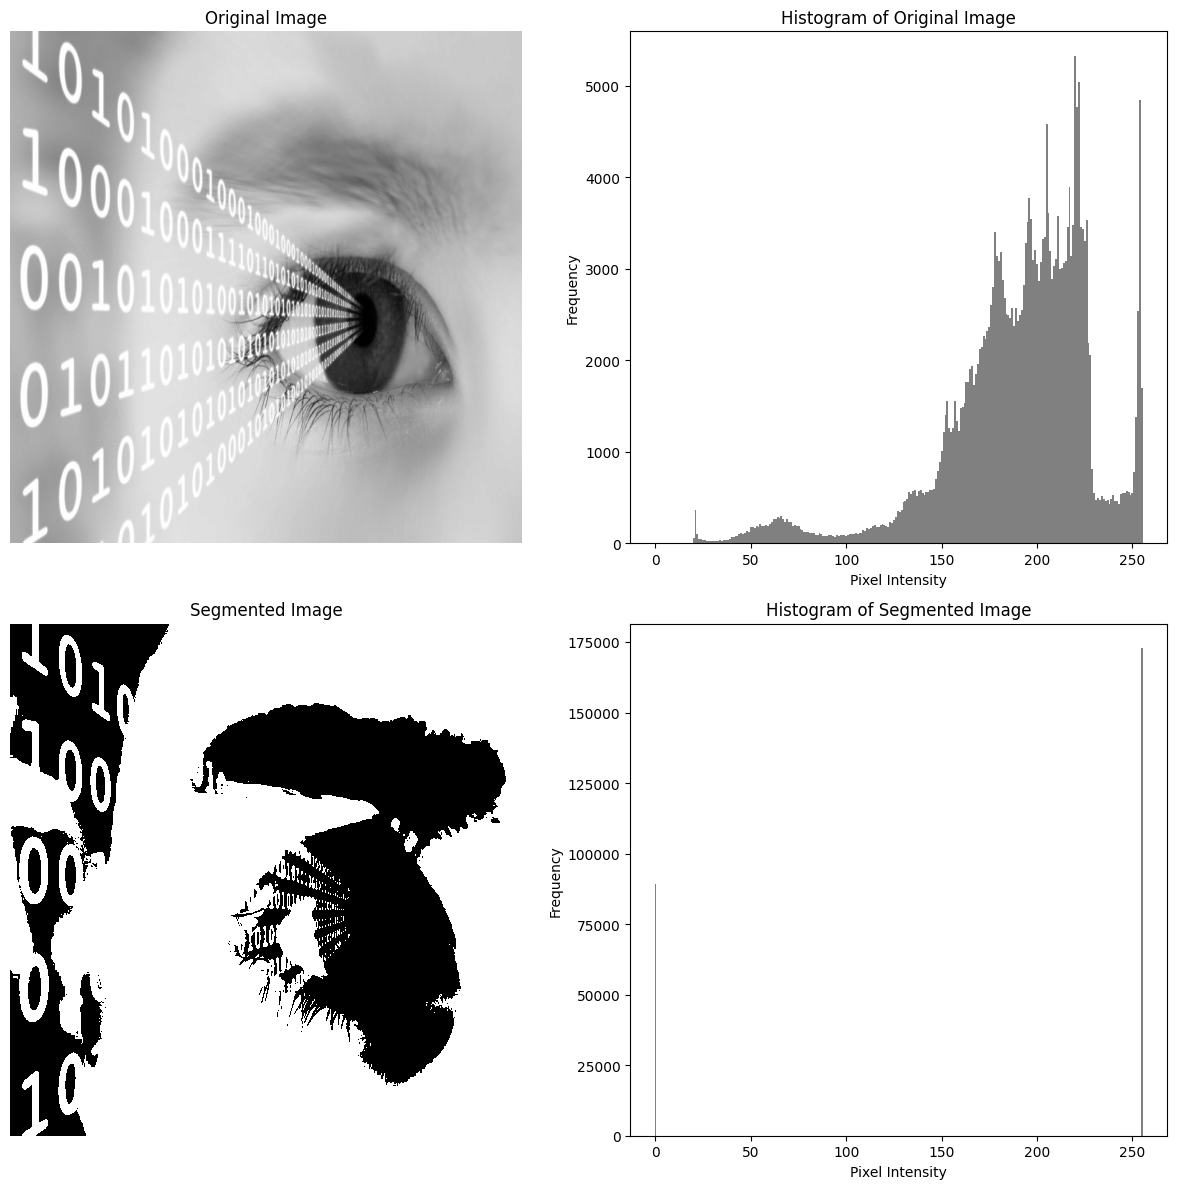

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def generate_histogram(image):
    """
    Generate a histogram for the given grayscale image.

    Parameters:
        image (numpy.ndarray): Input grayscale image.

    Returns:
        numpy.ndarray: Histogram of pixel intensities.
    """
    histogram = np.zeros(256)  # Array for pixel intensity counts (0–255)
    height, width = image.shape

    for i in range(height):
        for j in range(width):
            histogram[image[i, j]] += 1
    return histogram

def calculate_global_threshold(image, tolerance=1):
    """
    Calculate the threshold value using a basic global thresholding algorithm.

    Parameters:
        image (numpy.ndarray): Input grayscale image.
        tolerance (int): Convergence tolerance for the threshold.

    Returns:
        int: Calculated threshold value.
    """
    # Initial threshold: Mean pixel intensity
    current_threshold = np.mean(image)
    while True:
        # Split into two groups
        below_threshold = image[image <= current_threshold]
        above_threshold = image[image > current_threshold]

        # Calculate means of the two groups
        mean_below = np.mean(below_threshold) if below_threshold.size > 0 else 0
        mean_above = np.mean(above_threshold) if above_threshold.size > 0 else 0

        # Update threshold
        new_threshold = (mean_below + mean_above) / 2

        # Check for convergence
        if abs(new_threshold - current_threshold) < tolerance:
            break
        current_threshold = new_threshold

    return int(new_threshold)

def plot_histograms_and_images(original_image, segmented_image):
    """
    Plot histograms and display the original and segmented images side by side.

    Parameters:
        original_image (numpy.ndarray): Original grayscale image.
        segmented_image (numpy.ndarray): Segmented binary image.
    """
    # Generate histograms
    original_histogram = generate_histogram(original_image)
    segmented_histogram = generate_histogram(segmented_image)

    # Plot images and histograms
    plt.figure(figsize=(12, 12))

    # Original image and histogram
    plt.subplot(2, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.bar(range(256), original_histogram, color='gray', width=1)
    plt.title('Histogram of Original Image')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    # Segmented image and histogram
    plt.subplot(2, 2, 3)
    plt.imshow(segmented_image, cmap='gray')
    plt.title('Segmented Image')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.bar(range(256), segmented_histogram, color='gray', width=1)
    plt.title('Histogram of Segmented Image')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

def plot_histogram_and_segment(image, threshold):
    """
    Perform threshold segmentation and return the segmented binary image.

    Parameters:
        image (numpy.ndarray): Input grayscale image.
        threshold (int): Threshold value for segmentation.

    Returns:
        numpy.ndarray: Segmented binary image.
    """
    # Apply threshold segmentation
    segmented_image = np.where(image > threshold, 255, 0).astype(np.uint8)
    return segmented_image

# Load a 512x512 grayscale image
image_path = "img.jpg"  # Replace with your image path
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if original_image is None:
    raise ValueError("Could not load the image. Please check the file path.")

# Resize image if not 512x512
if original_image.shape != (512, 512):
    original_image = cv2.resize(original_image, (512, 512), interpolation=cv2.INTER_AREA)

# Calculate the global threshold
threshold_value = calculate_global_threshold(original_image)

# Perform segmentation using the calculated threshold
segmented_image = plot_histogram_and_segment(original_image, threshold_value)

# Plot original and segmented images with histograms
plot_histograms_and_images(original_image, segmented_image)
